In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import read_data
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import math

In [2]:
RD = read_data.ReadData()
hd = RD.read_Hd()
hd.head()
hd.rename(columns={'id': 'point_id'}, inplace=True)

In [3]:
products = ['product1', 'product2', 'product3', 'product4']

## Number of sales for different days of the week

In [4]:
hd['dzien_tygodnia'] = pd.to_datetime(hd.dzien_rozliczenia).dt.dayofweek
hd.head()

,point_id,dzien_rozliczenia,product1,product2,product3,product4,dzien_tygodnia
0,7,2023-11-04,90.0,67,0.0,1.0,5
1,6,2023-11-04,39.0,27,0.0,0.0,5
2,1,2023-11-04,131.0,74,0.0,0.0,5
3,9,2023-11-04,56.0,30,0.0,0.0,5
4,4,2023-11-04,115.0,56,0.0,0.0,5


In [5]:
hd[(hd.dzien_tygodnia == 6)].point_id.unique()

array([ 2,  4, 37,  1,  6])

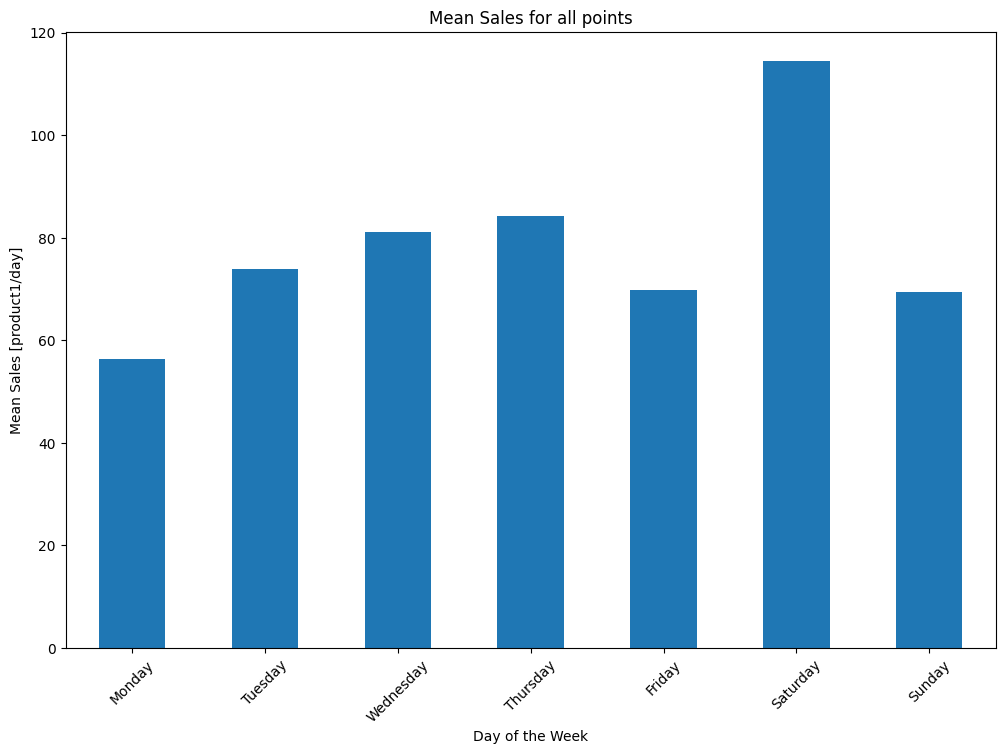

In [6]:
hd.groupby('dzien_tygodnia').product1.mean().plot(kind='bar', figsize=(12, 8))
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.title(f'Mean Sales for all points')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Sales [product1/day]')
plt.show()

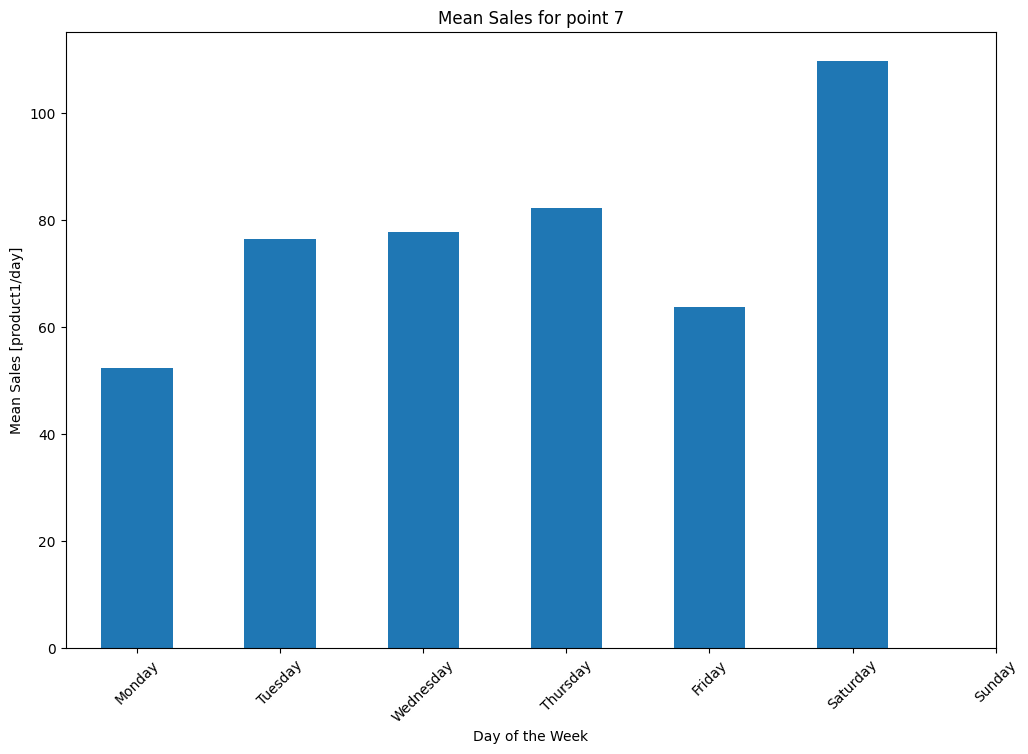

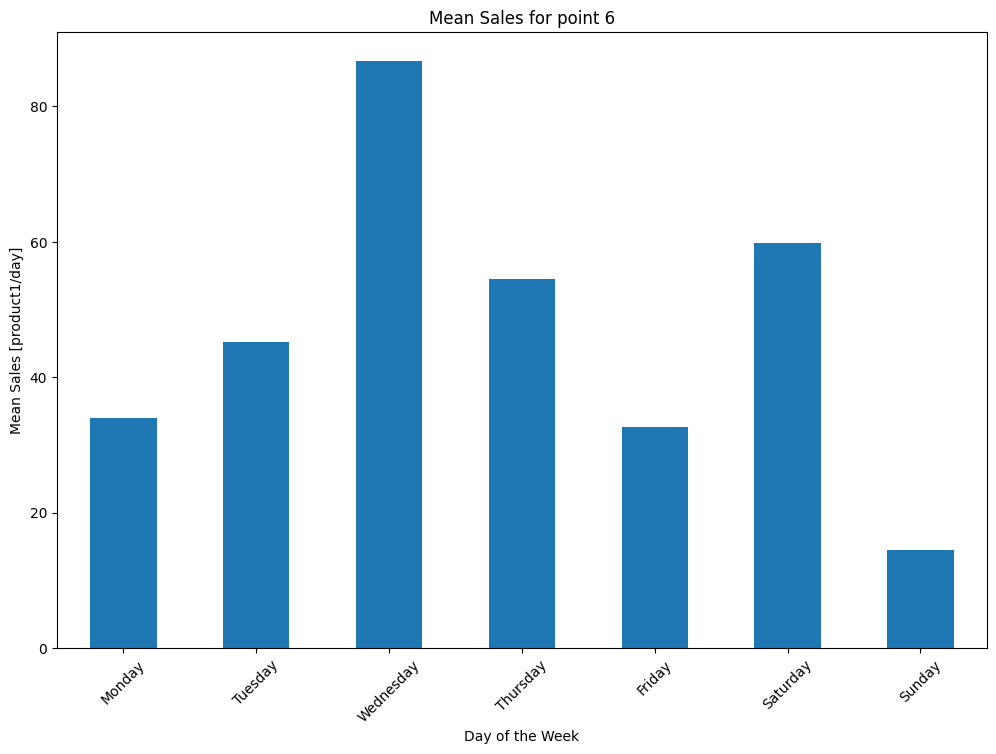

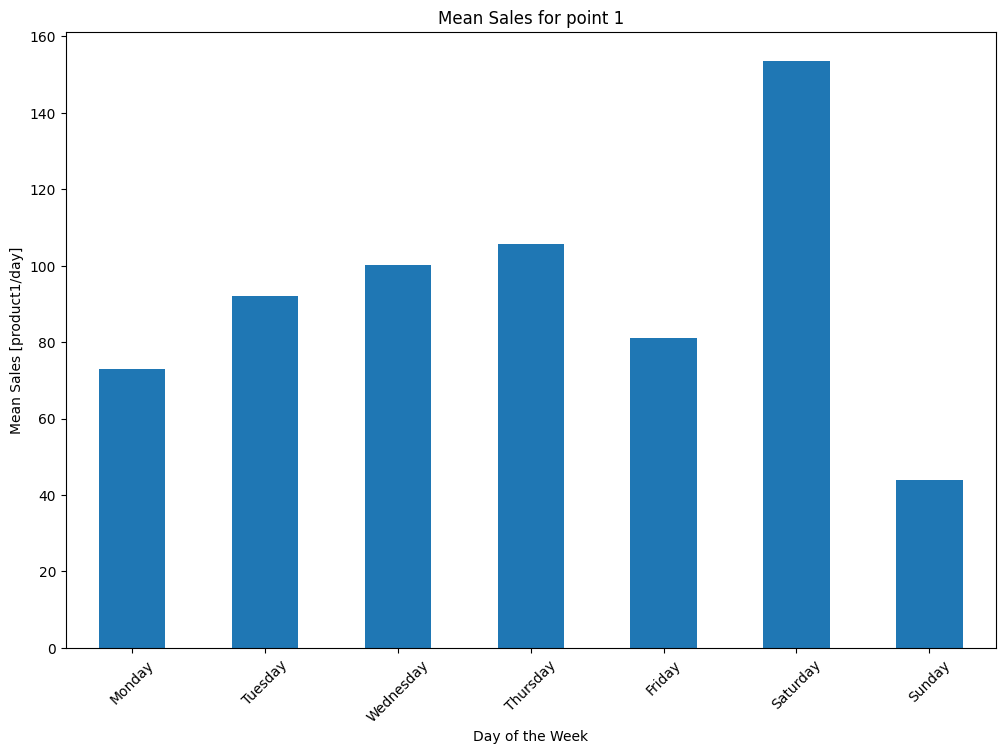

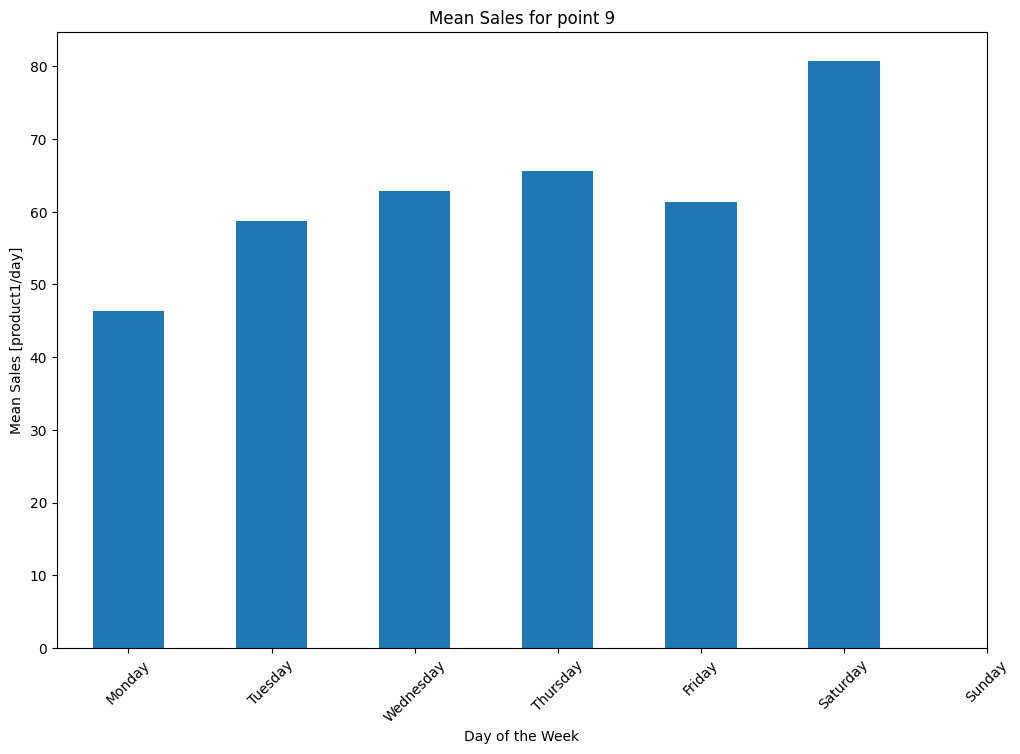

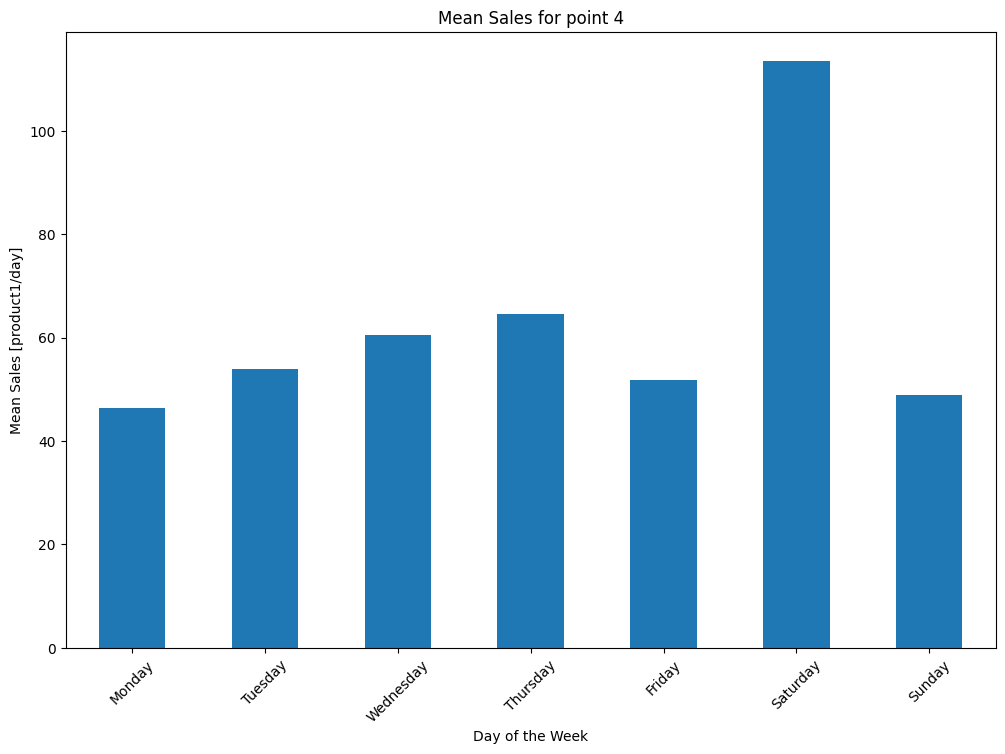

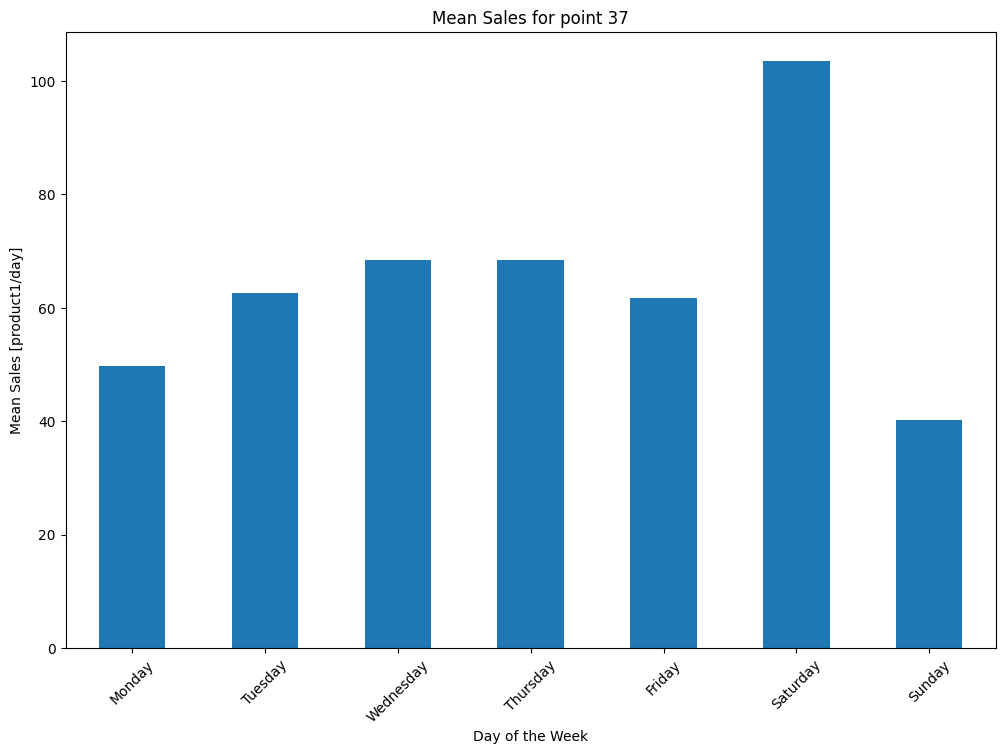

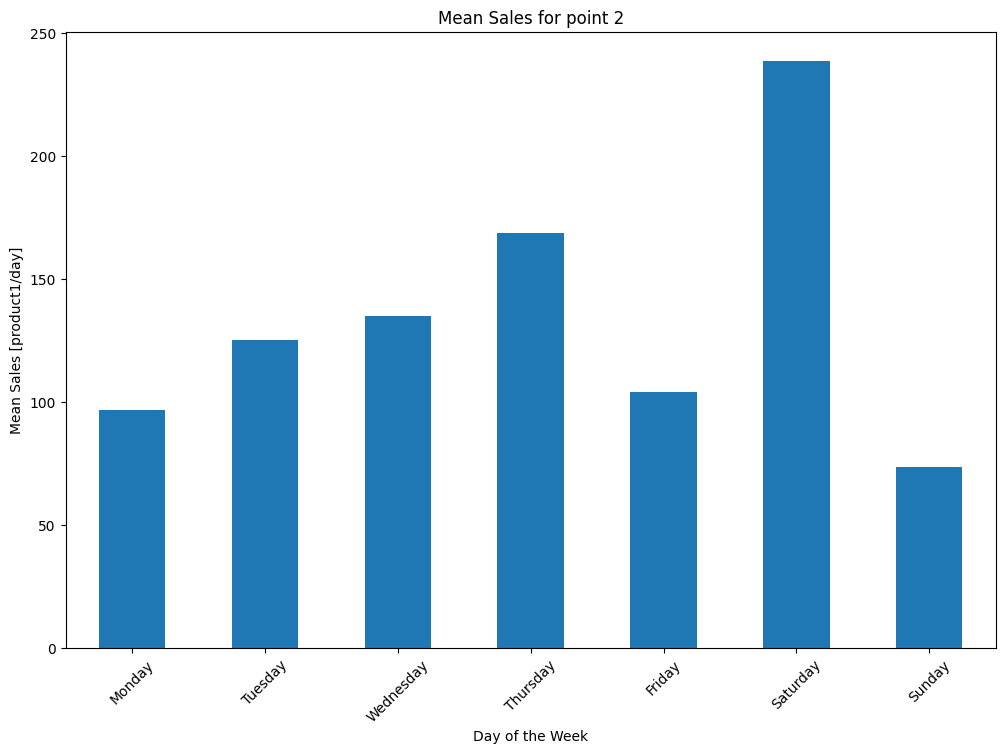

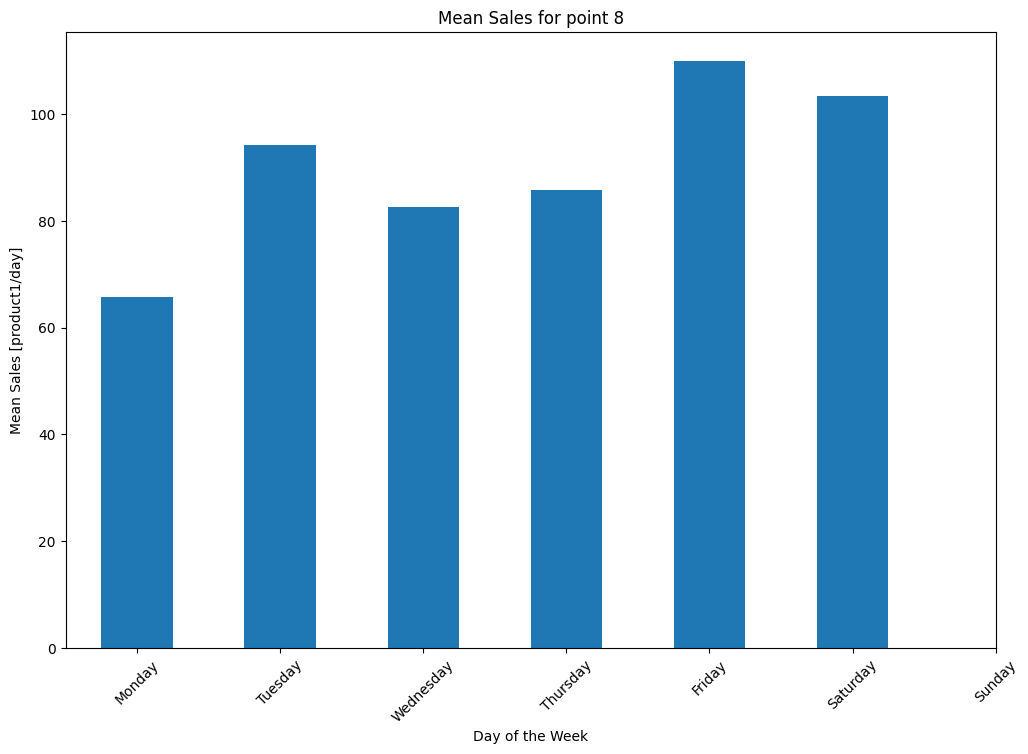

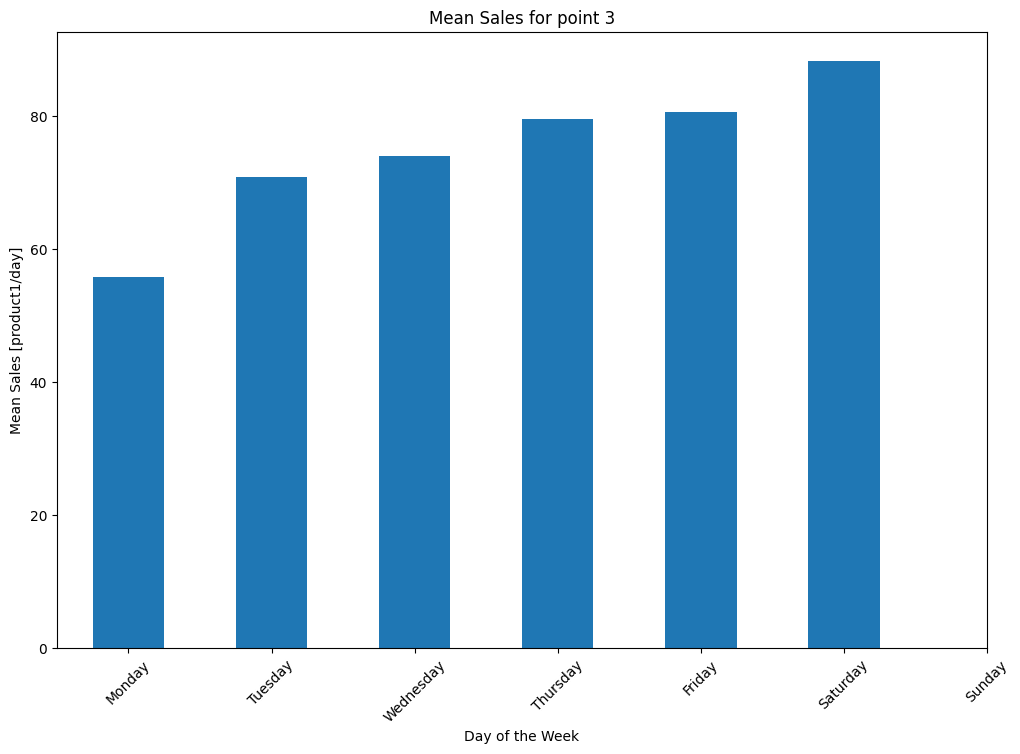

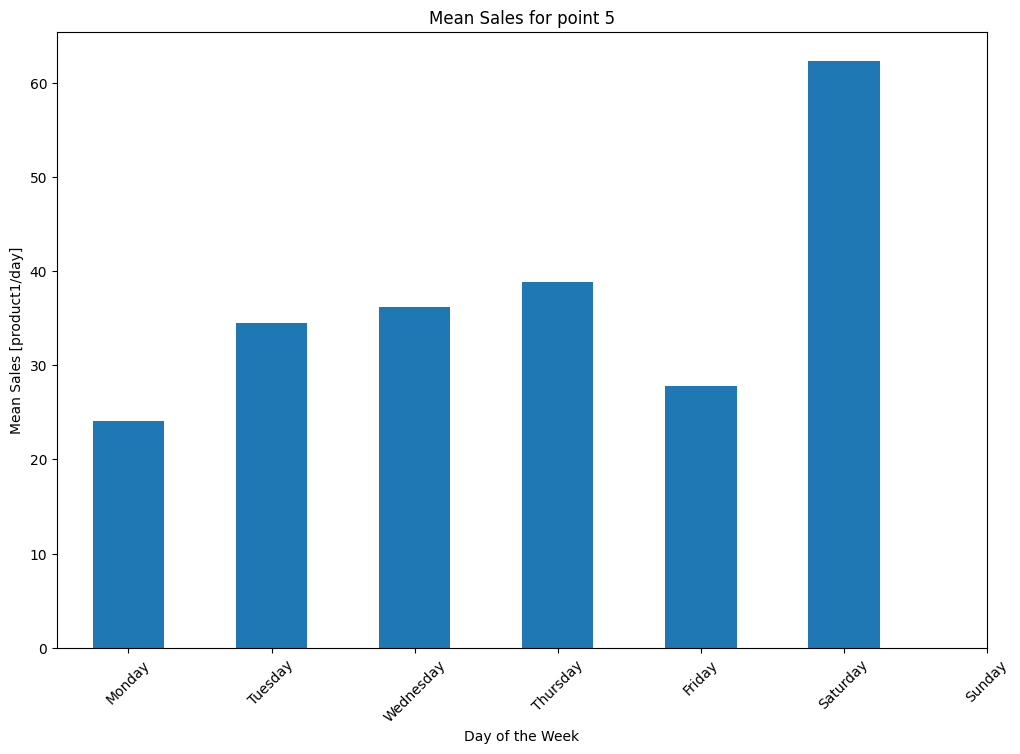

In [7]:
for point in hd.point_id.unique():
    plt.figure(figsize=(12, 8))
    hd[hd.point_id == point].groupby('dzien_tygodnia').product1.mean().plot(kind='bar', stacked = True)
    labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.title(f'Mean Sales for point {point}')
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.xlabel('Day of the Week')
    plt.ylabel('Mean Sales [product1/day]')
    plt.show()

## Correlation between sales on different points for each product

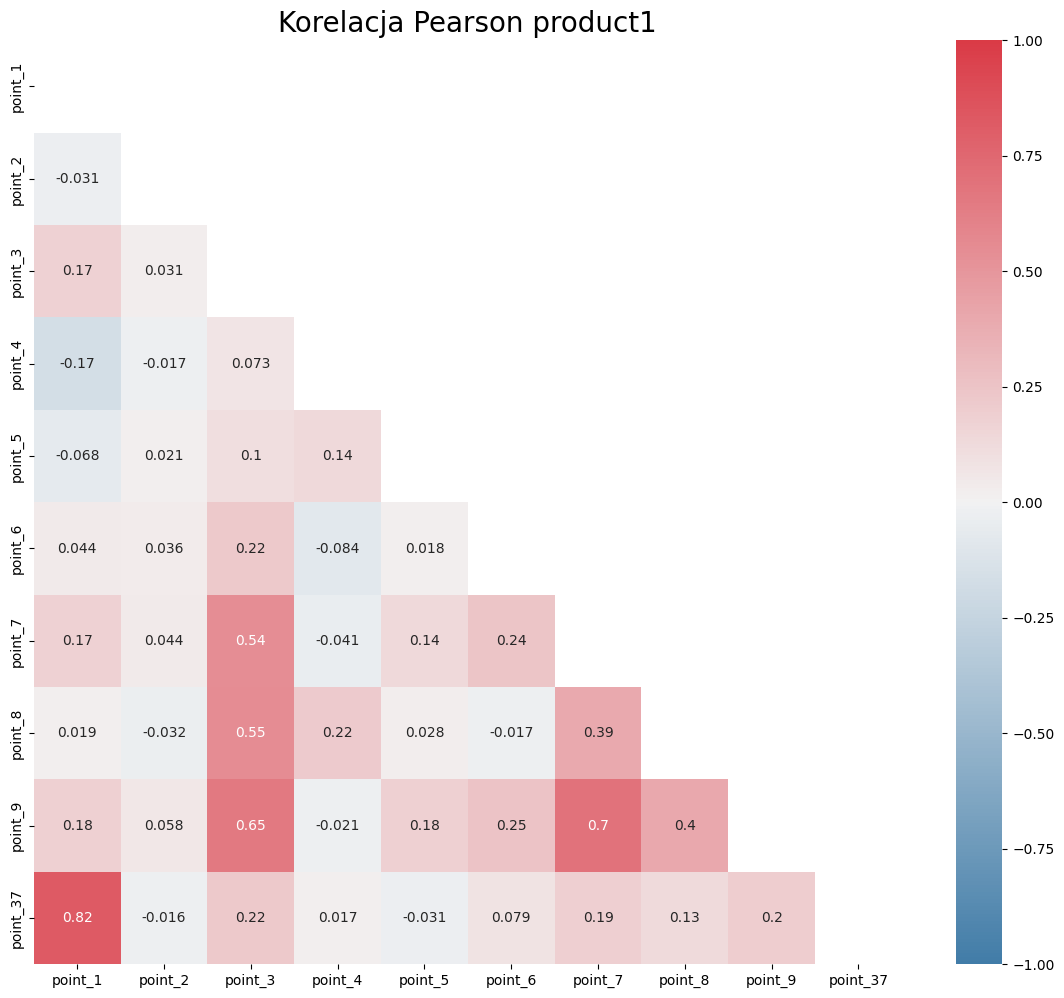

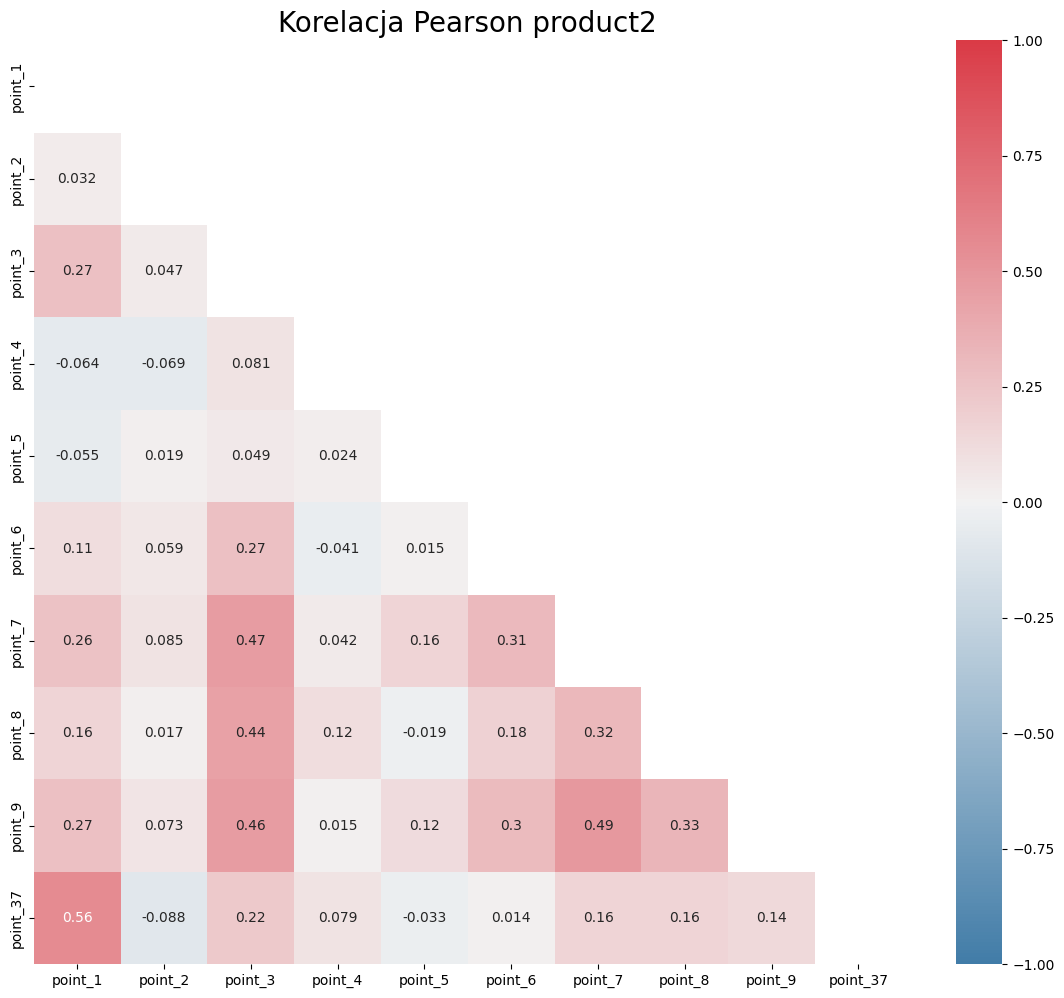

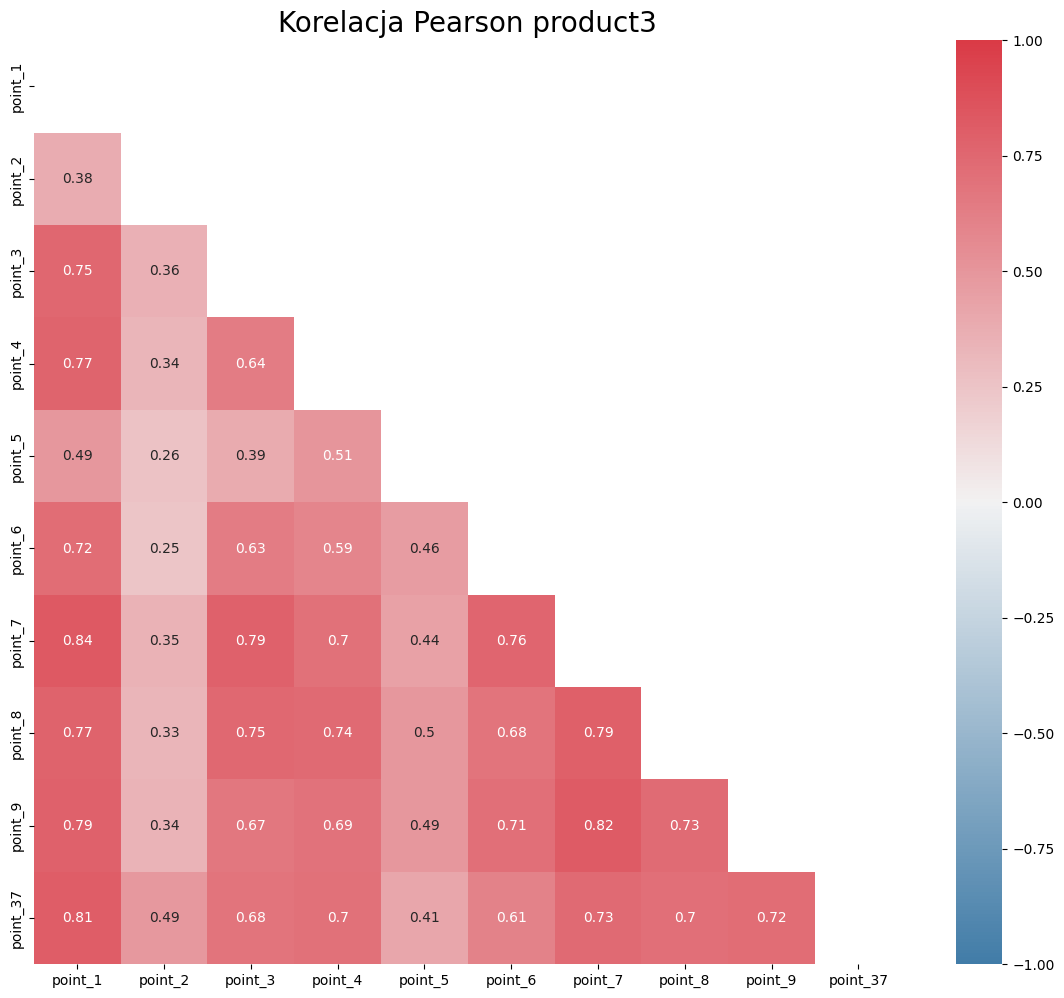

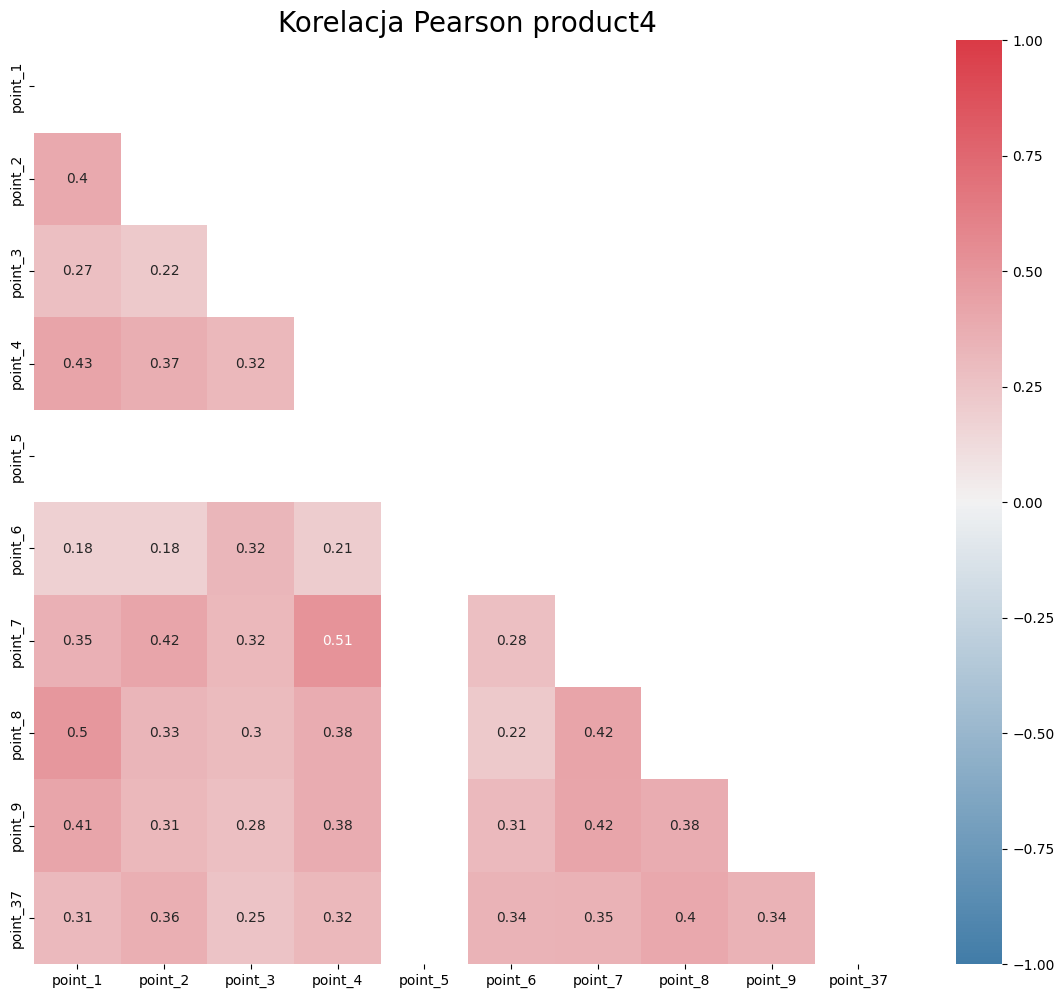

In [8]:
for product in products:
    ids = hd['point_id'].unique()
    product_df = pd.DataFrame()
    for id in sorted(ids):
        product_df['point_' + str(id)] = hd[product][hd['point_id'] == id].reset_index(drop=True)
    matrix = product_df.corr()
    
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    plt.figure(figsize=(14, 12))
    plt.title(f'Korelacja Pearson {product}', fontsize=20)
    
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    sns.heatmap(matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, mask=mask)
    plt.show()

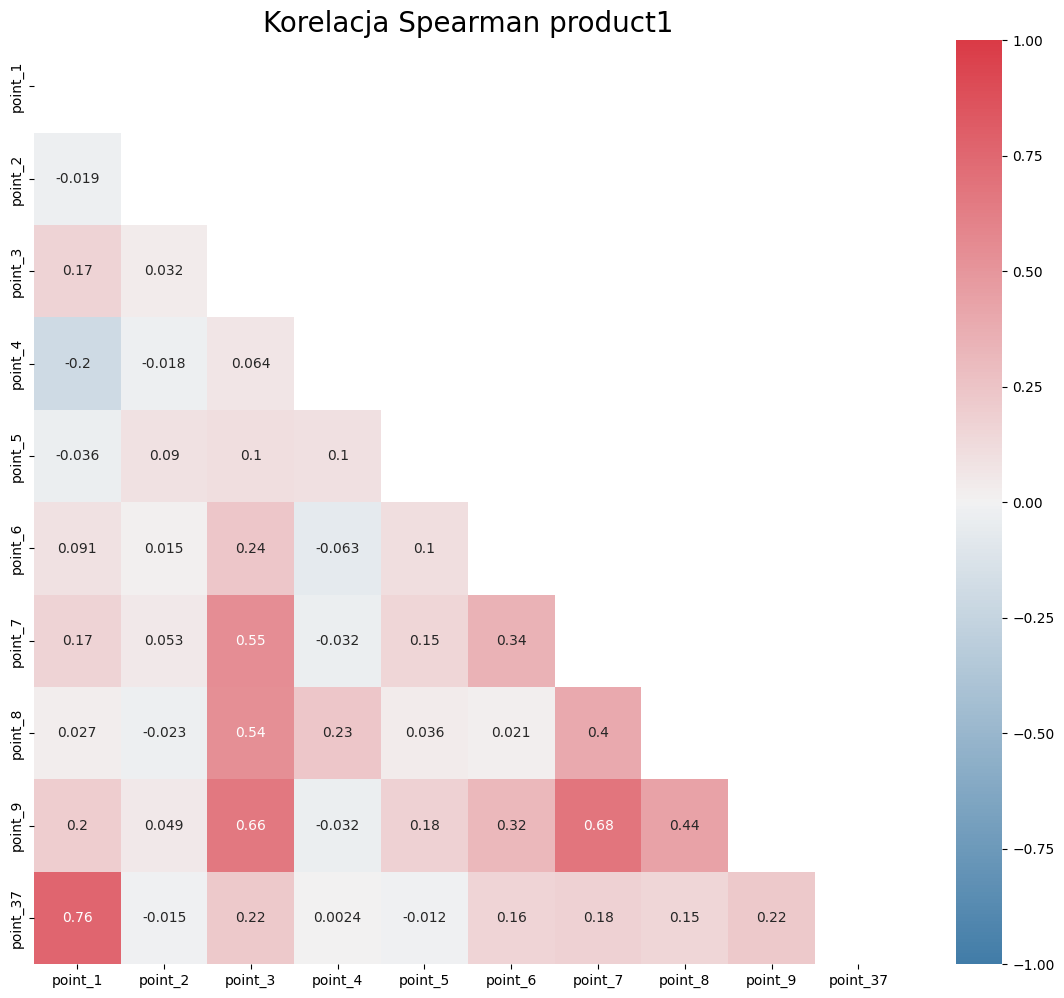

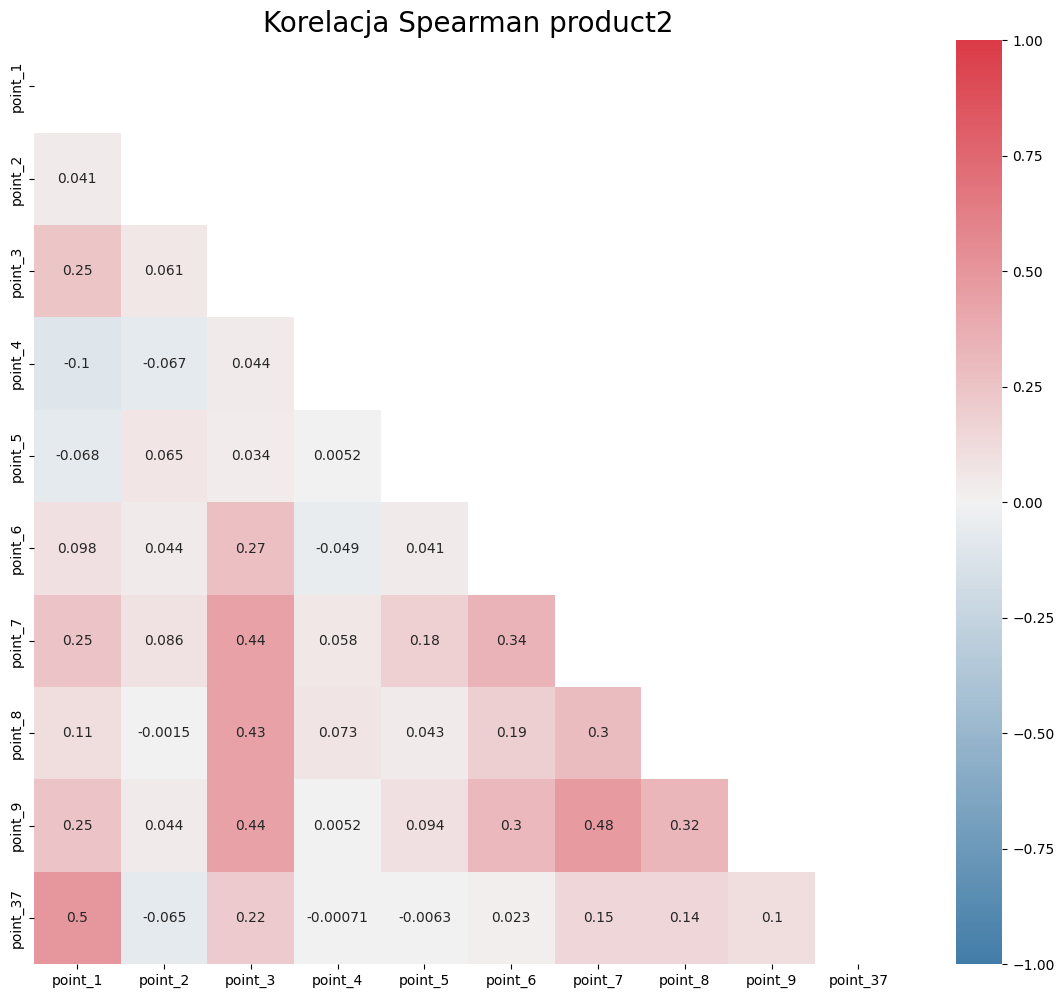

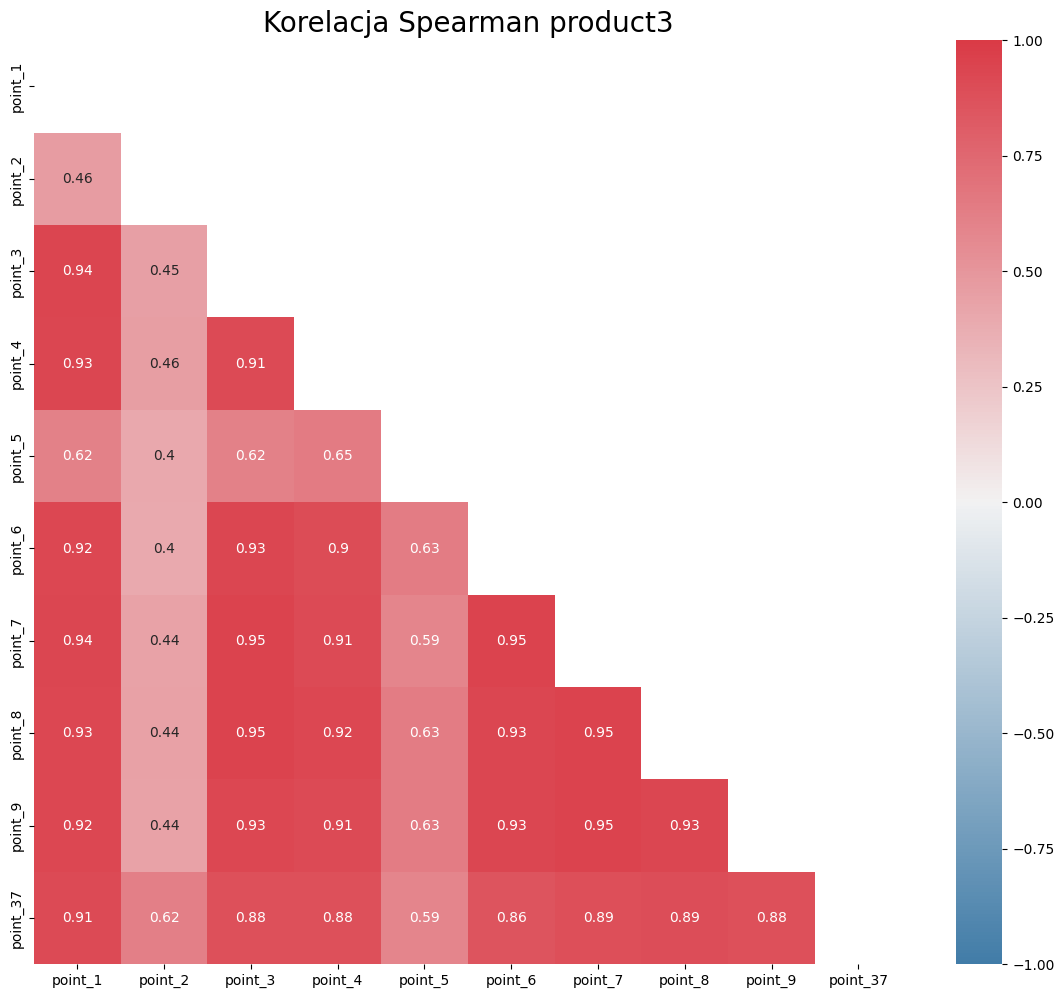

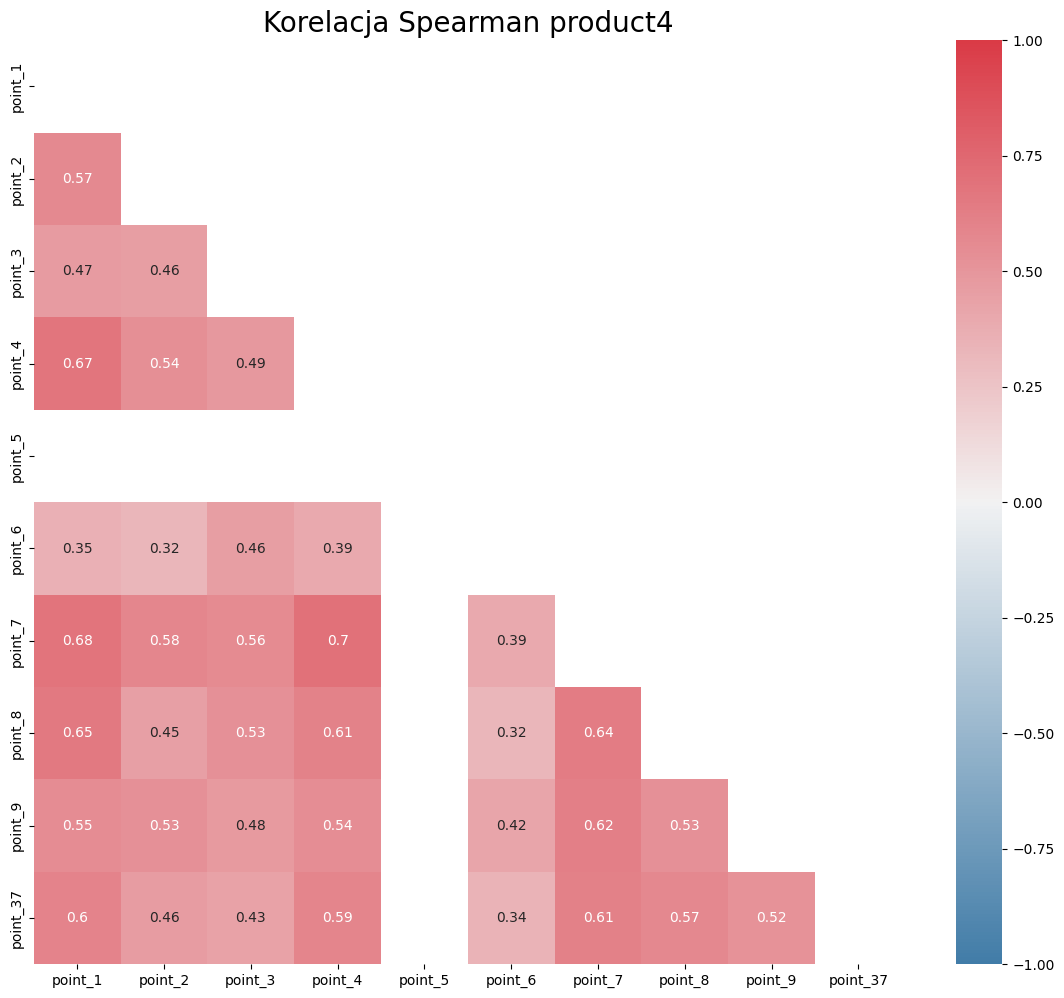

In [9]:
for product in products:
    ids = hd['point_id'].unique()
    product_df = pd.DataFrame()
    for id in sorted(ids):
        product_df['point_' + str(id)] = hd[product][hd['point_id'] == id].reset_index(drop=True)
    matrix = product_df.corr(method='spearman')
    
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    plt.figure(figsize=(14, 12))
    plt.title(f'Korelacja Spearman {product}', fontsize=20)
    
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    sns.heatmap(matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, mask=mask)
    plt.show()

## ACF 

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/opt/homebrew/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/opt/homebrew/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/opt/homebrew/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/opt/homebrew/lib/python3.11/site-packages/

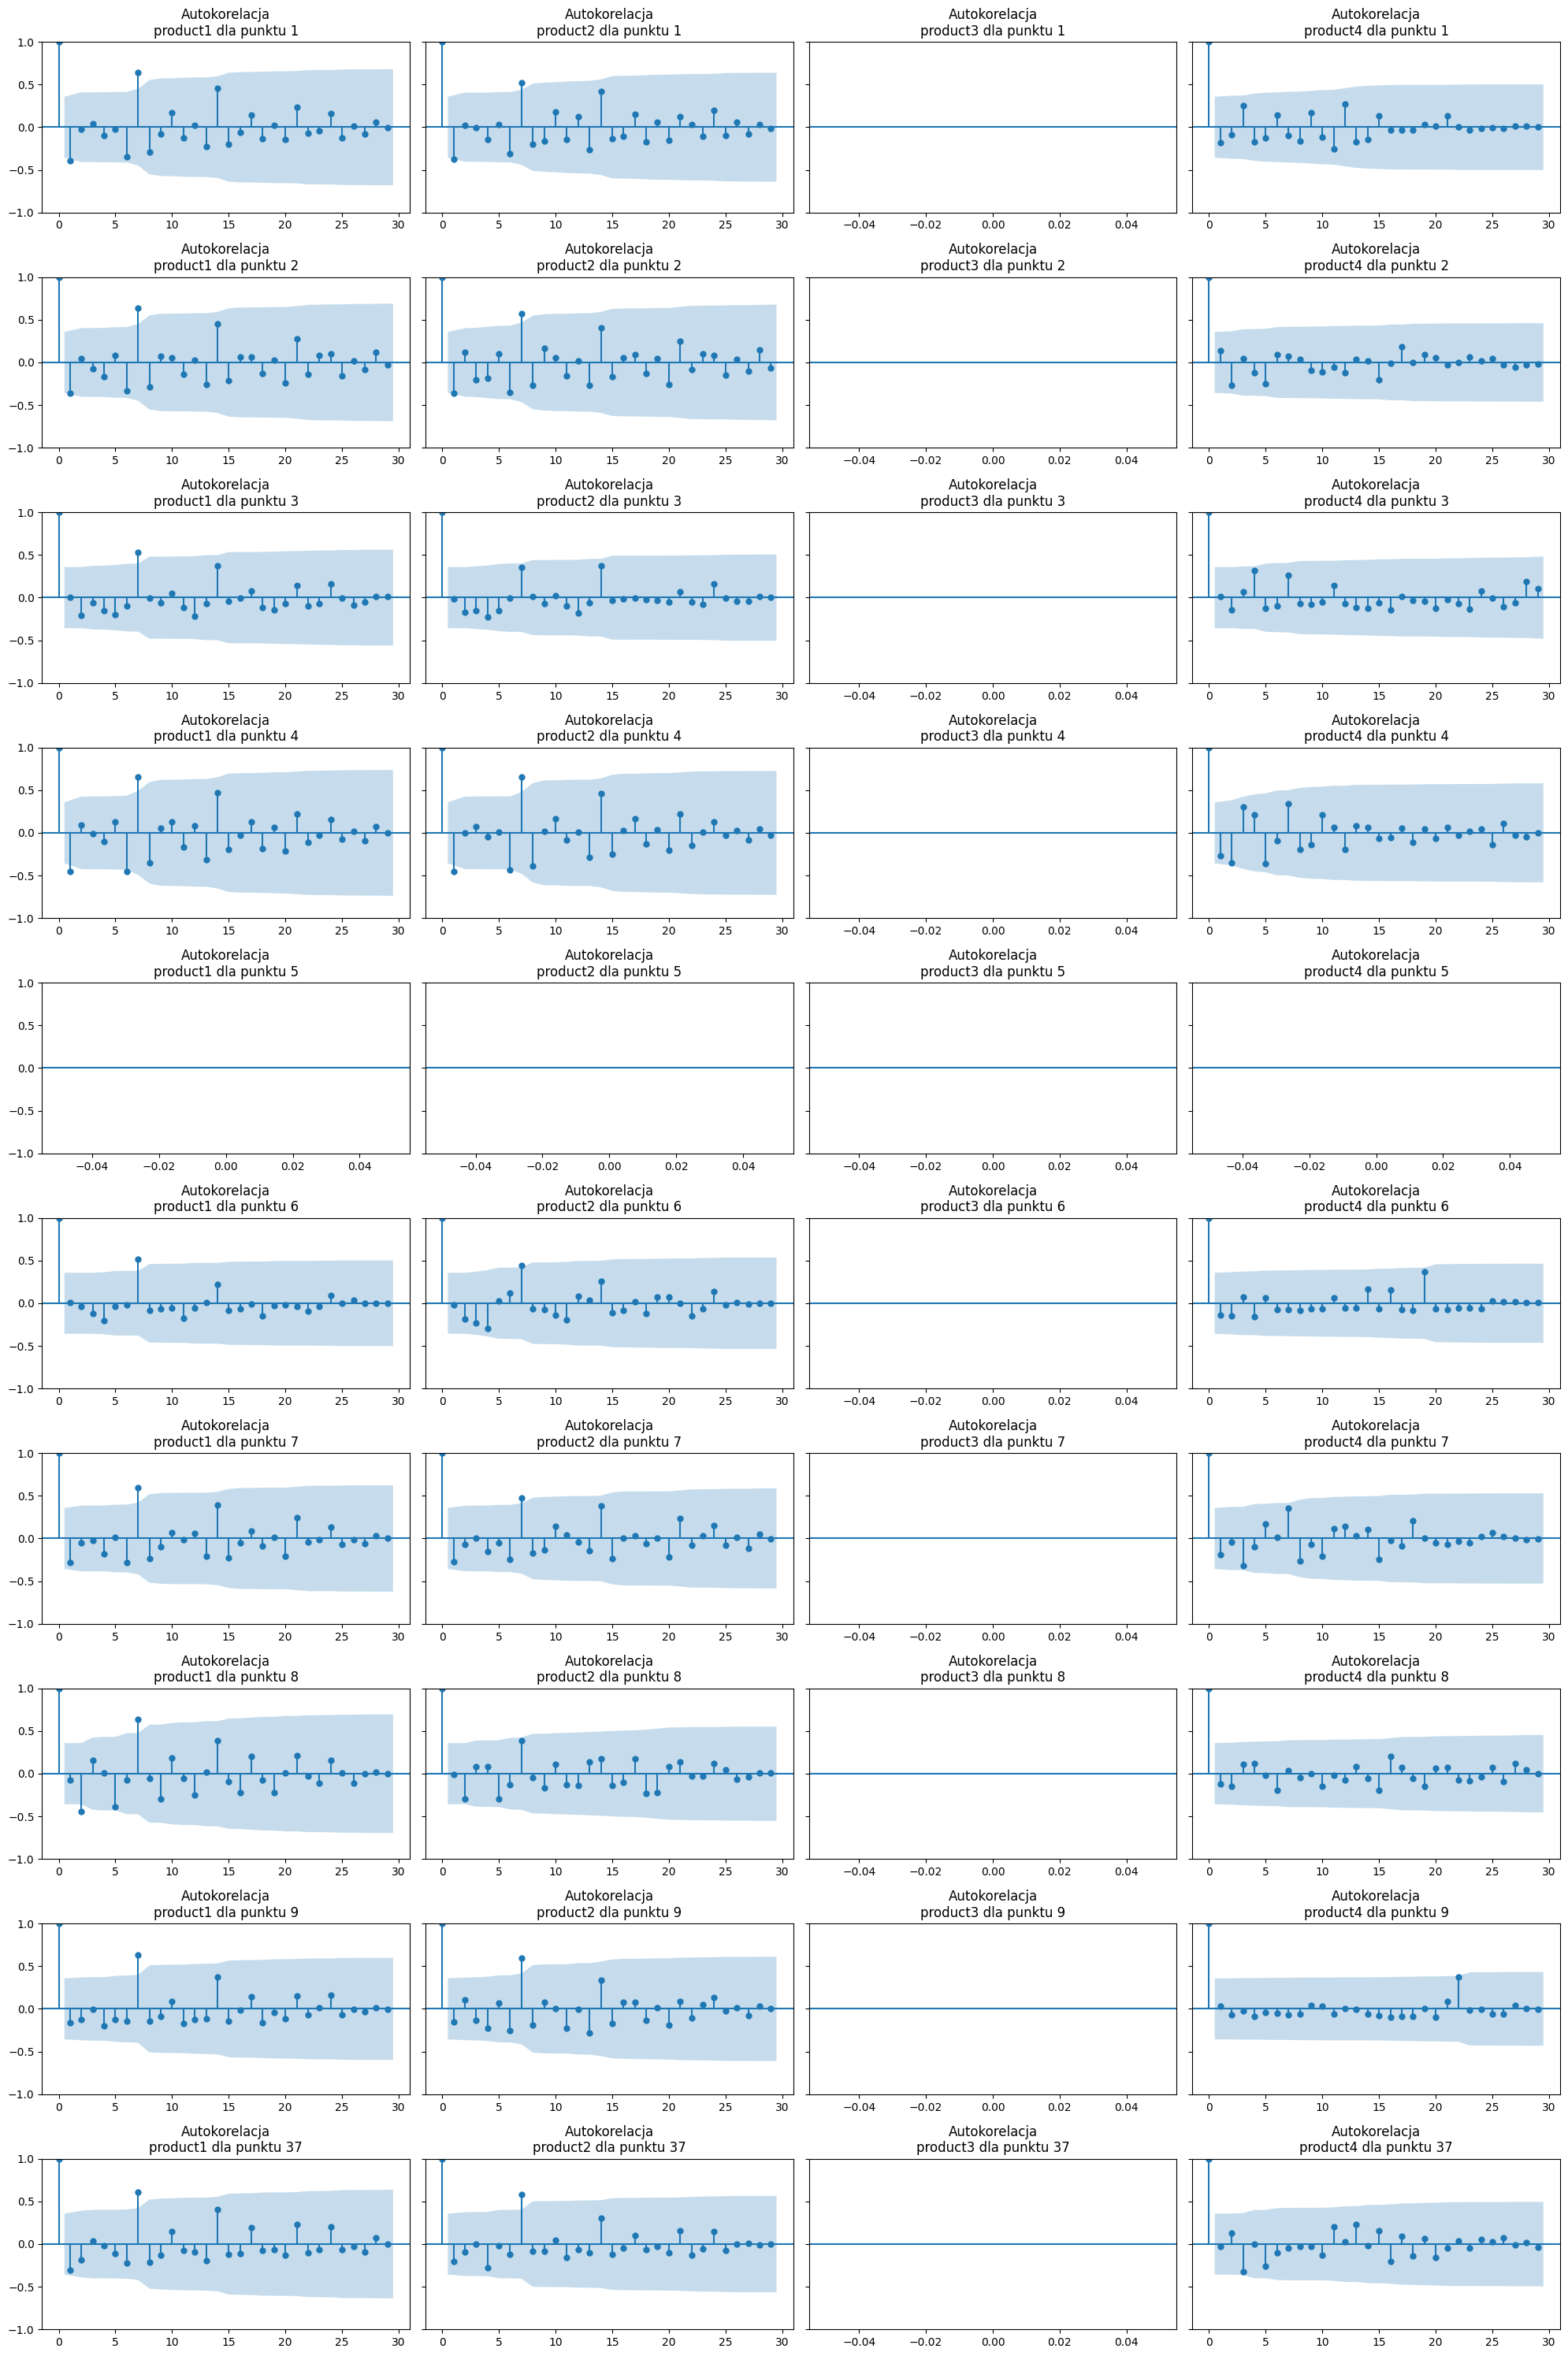

In [10]:
dates = hd['dzien_rozliczenia'].unique()
points = sorted(hd['point_id'].unique())

fig, axes = plt.subplots(nrows=len(points), ncols=len(products), figsize=(5*len(products), 3*len(points)), sharey='all')

for i, point in enumerate(points):
    dates_df = pd.DataFrame()
    dates_df['date'] = pd.date_range(start=np.min(dates), end=np.max(dates))
    dates_df = dates_df.iloc[::-1]
    dates_df['date'] = dates_df['date'].astype(str).str.slice(stop=10)

    for j, product in enumerate(products):
        n = 30
        dates_df[product] = dates_df['date'].apply(
            lambda date: hd[product][(hd['dzien_rozliczenia'] == date) & (hd['point_id'] == point)].values[0]
            if date in hd['dzien_rozliczenia'][(hd['point_id'] == point)].unique() else 0.0)

        # Plot on the corresponding subplot
        plot_acf(dates_df[product].head(n), lags=n-1, ax=axes[i, j],
                 title='Autokorelacja\n' + product + ' dla punktu ' + str(point))

# Adjust layout
plt.tight_layout()
plt.show()

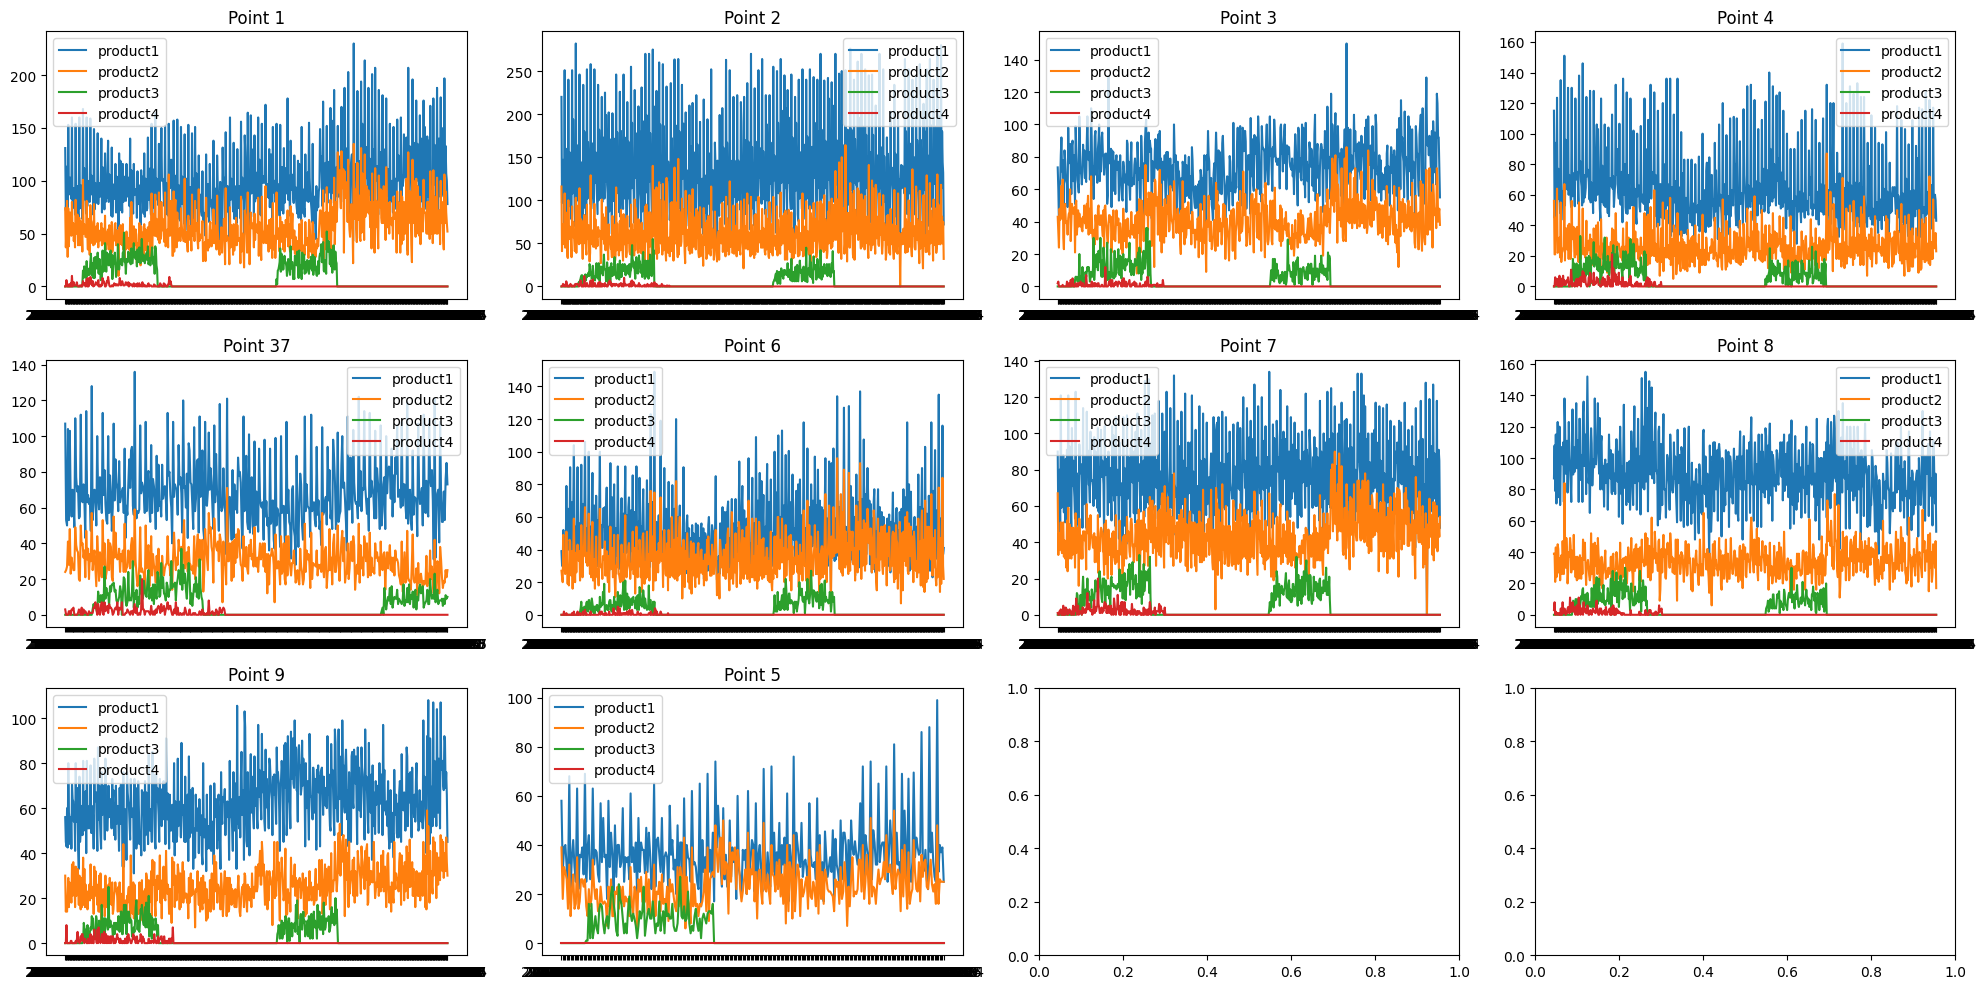

In [11]:
point_ids = set(hd.point_id)

num_plots = len(point_ids)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axes = axes.flatten()

for i, point in enumerate(point_ids):
    row = i // num_cols
    col = i % num_cols

    axes[i].plot(hd[hd.point_id == point].dzien_rozliczenia, hd[hd.point_id == point].product1, label='product1')
    axes[i].plot(hd[hd.point_id == point].dzien_rozliczenia, hd[hd.point_id == point].product2, label='product2')
    axes[i].plot(hd[hd.point_id == point].dzien_rozliczenia, hd[hd.point_id == point].product3, label='product3')
    axes[i].plot(hd[hd.point_id == point].dzien_rozliczenia, hd[hd.point_id == point].product4, label='product4')
    axes[i].set_title(f'Point {point}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [12]:
points_of_sales = sorted(hd.point_id.unique())

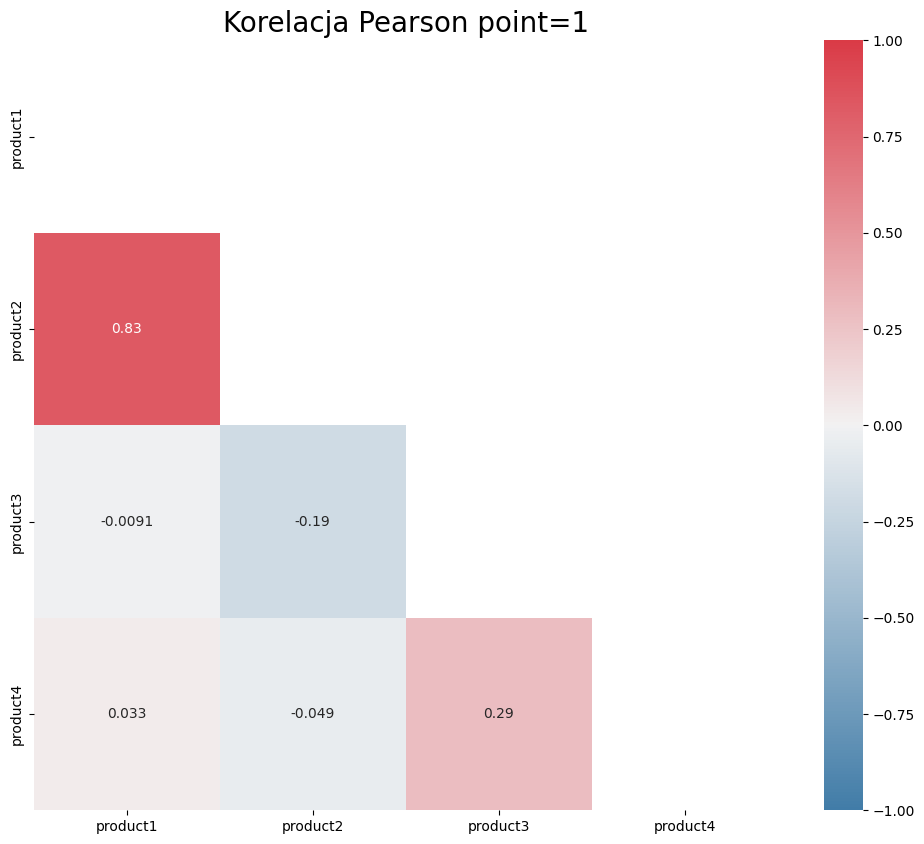

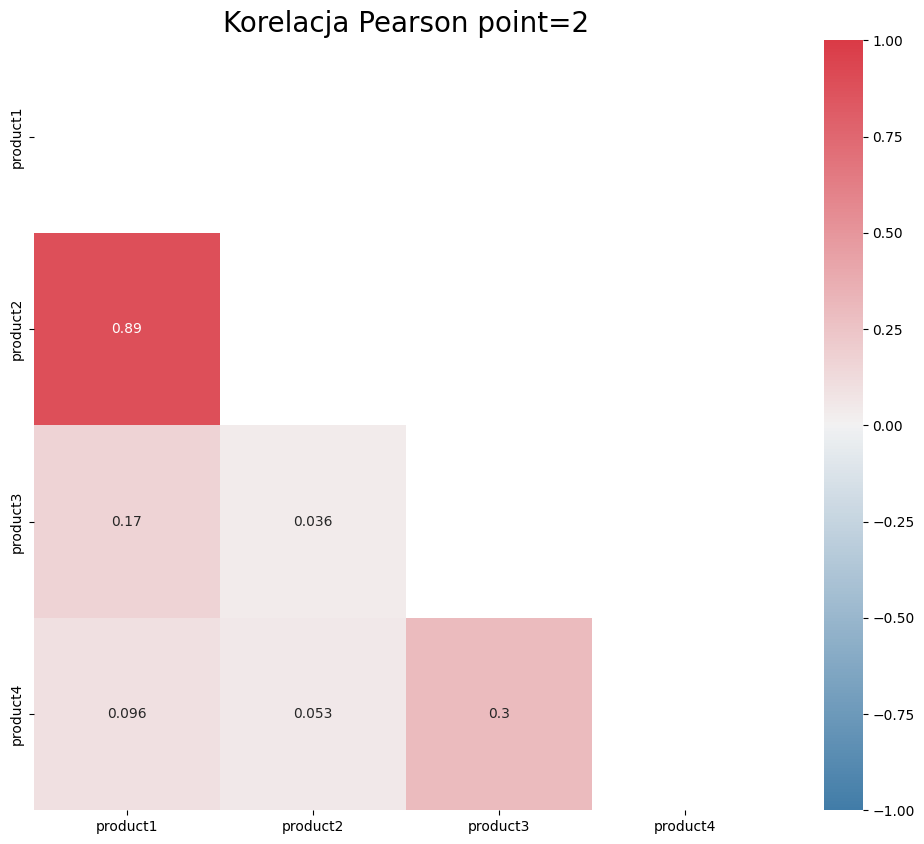

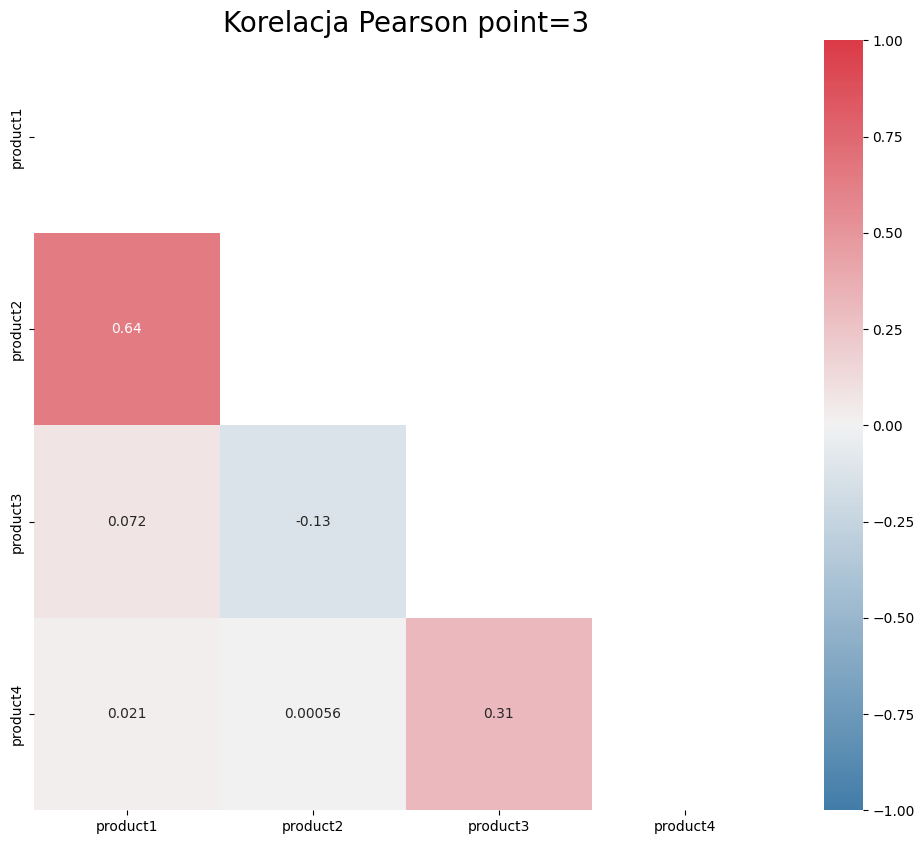

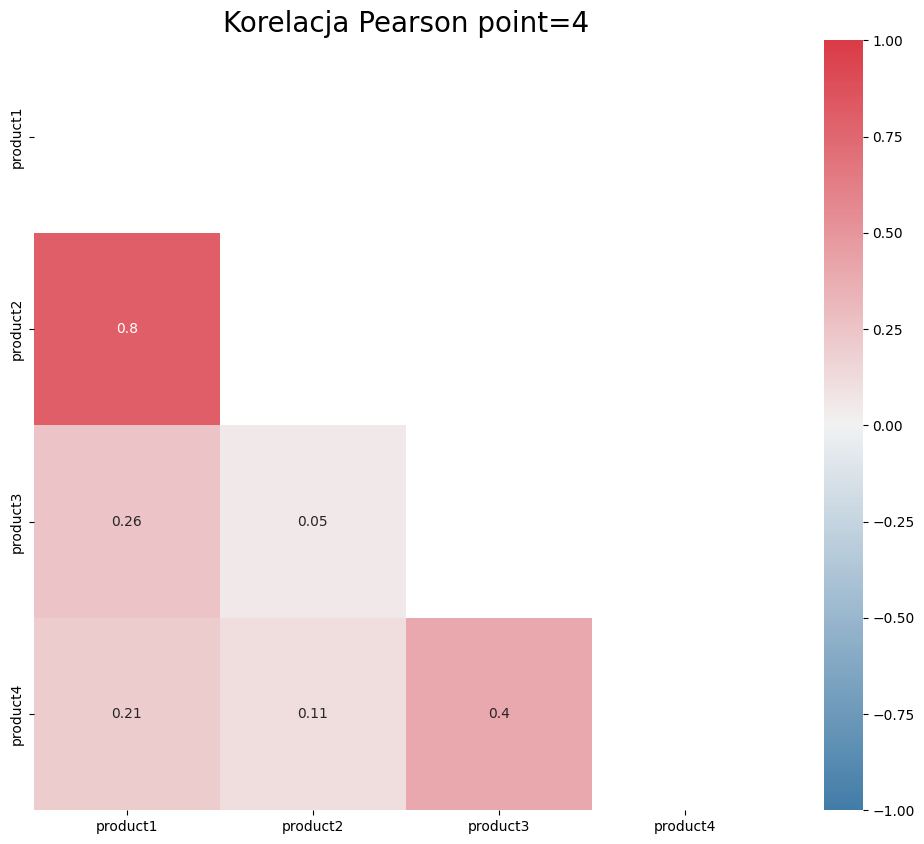

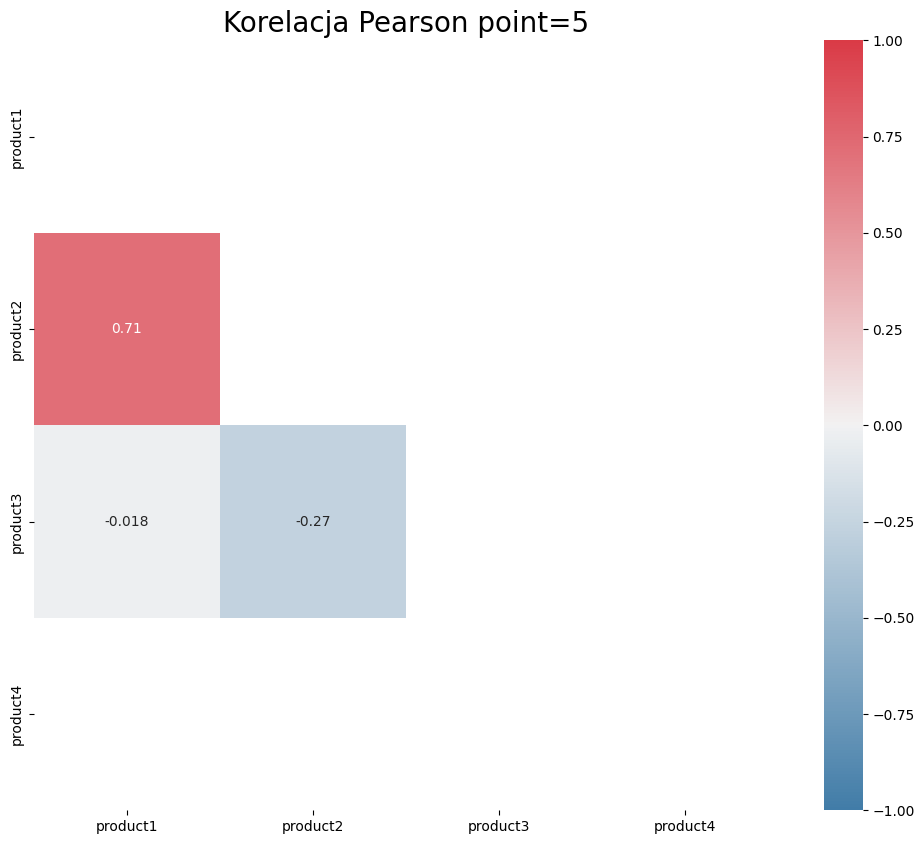

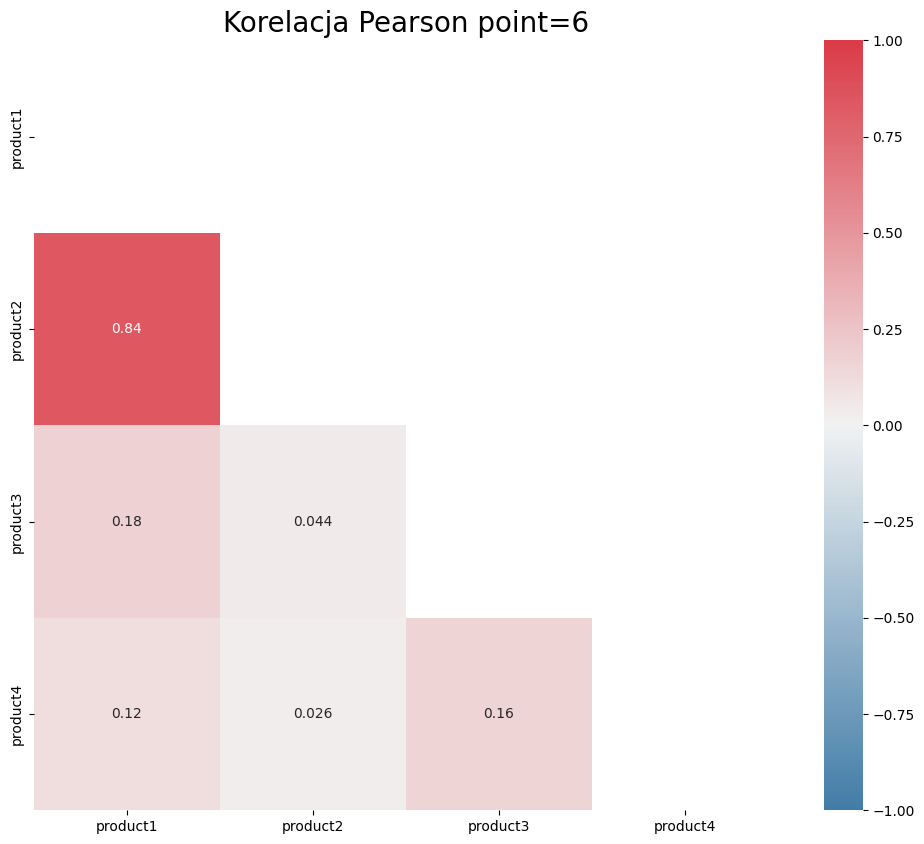

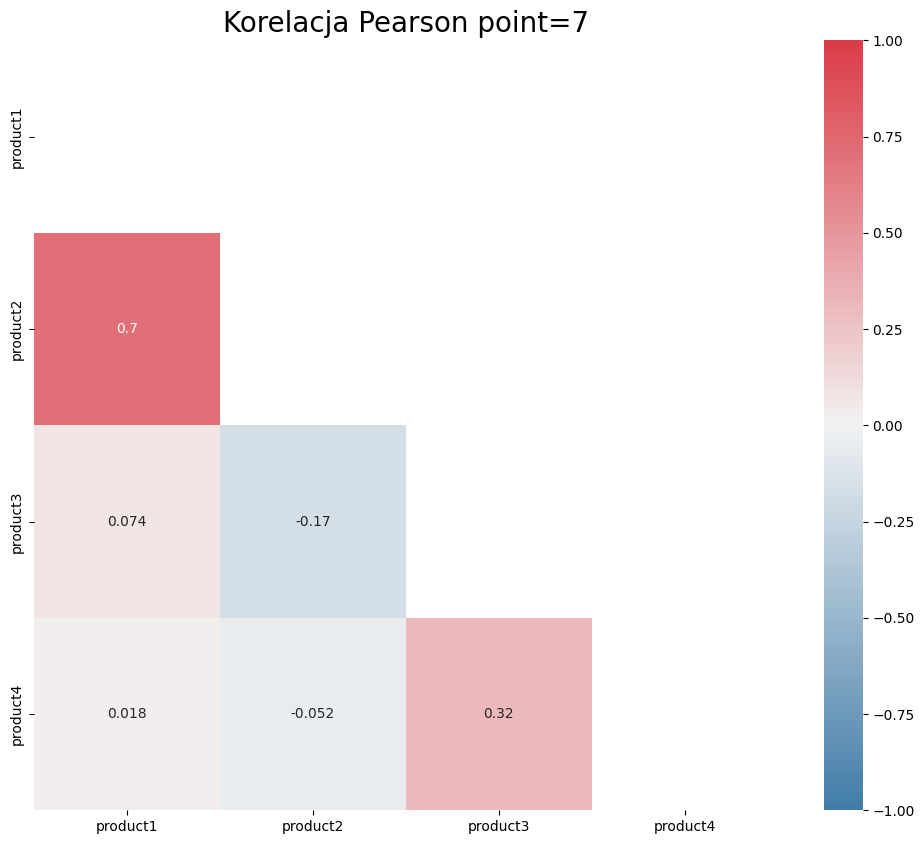

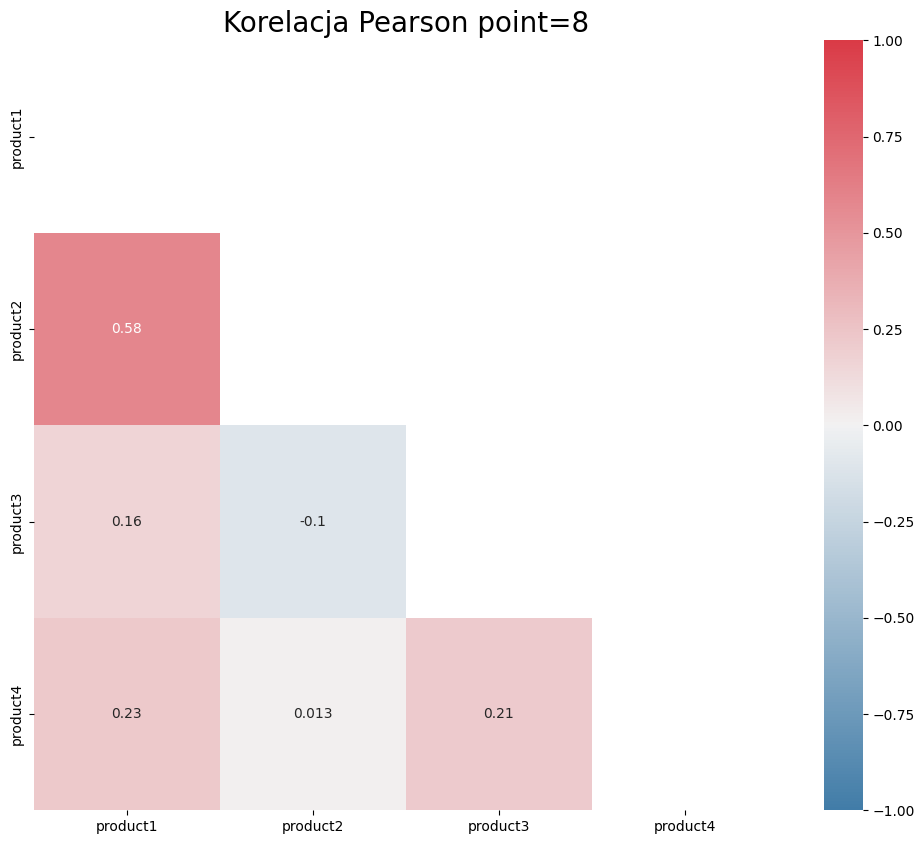

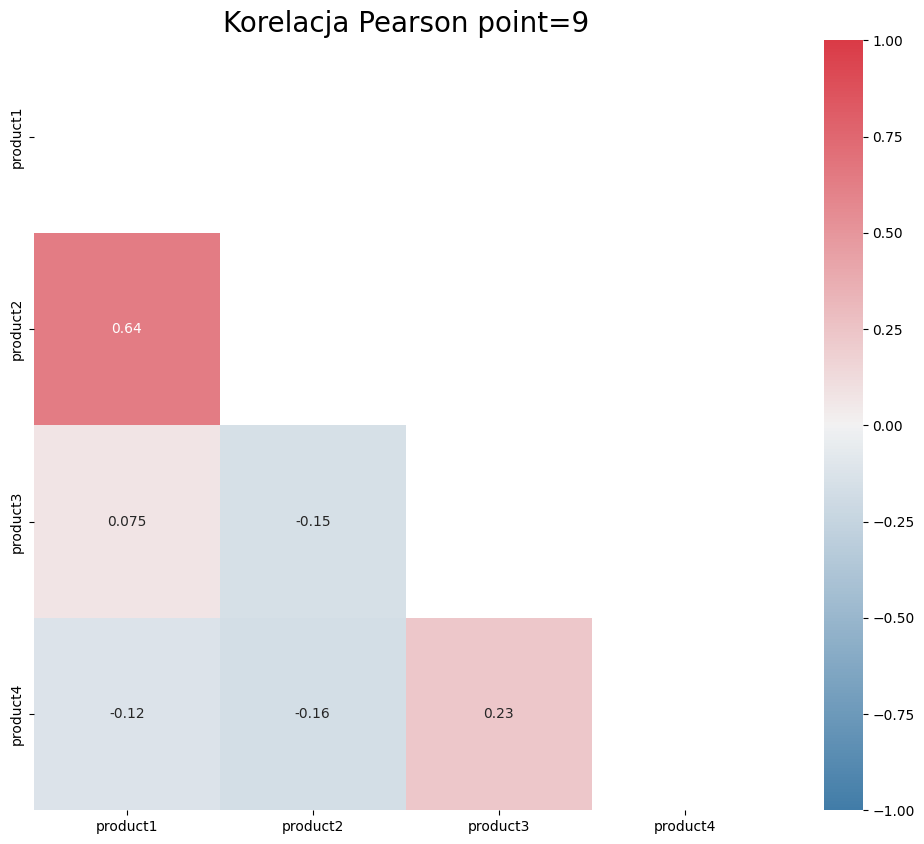

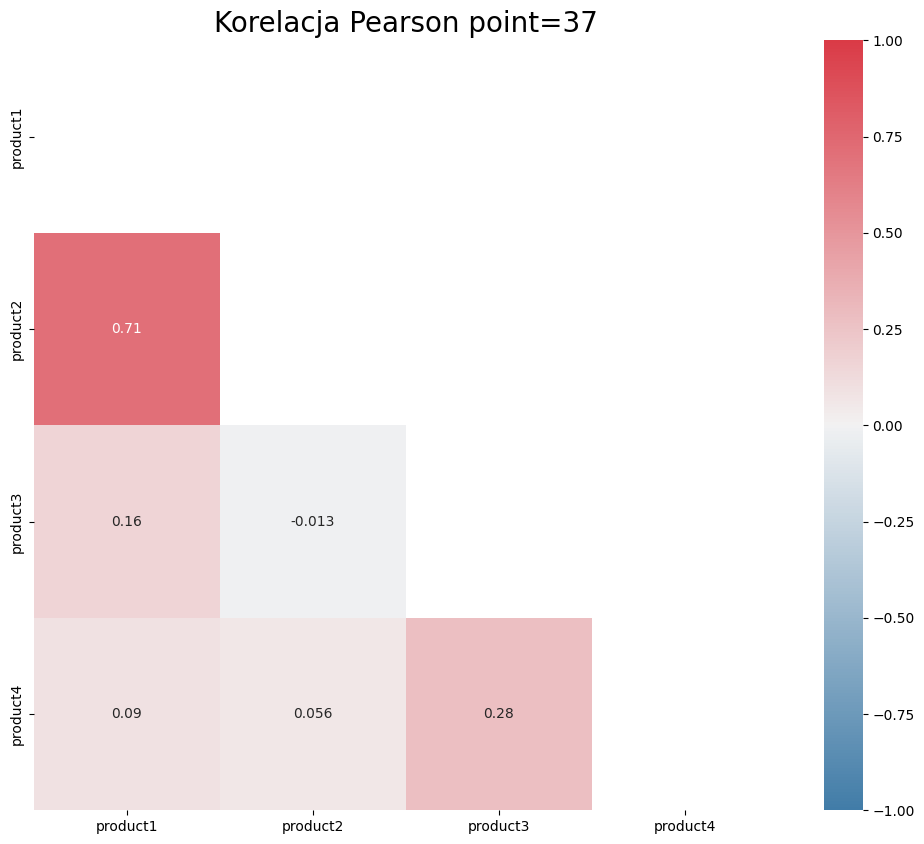

In [13]:
for point in points_of_sales:
    product_df = pd.DataFrame()
    for product in products:
        product_df[product] = hd[product][hd['point_id'] == point].reset_index(drop=True)
    matrix = product_df.corr()
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    plt.figure(figsize=(12, 10))
    plt.title(f'Korelacja Pearson point={point}', fontsize=20)
    
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    sns.heatmap(matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, mask=mask)
    plt.show()